In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Data Preprocessing

### Data Profilling

In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

### EDA

#### Univariate Analysis

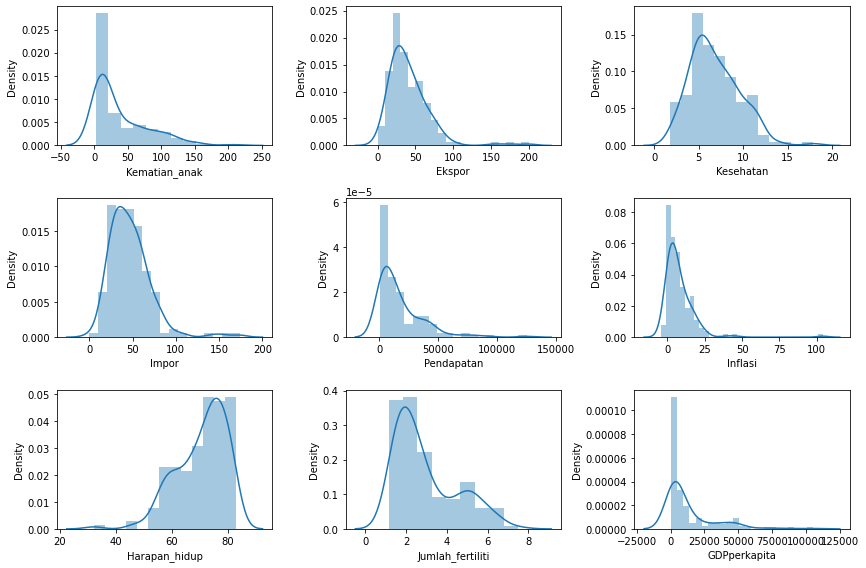

In [7]:
plt.figure(figsize=(12,8))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.tight_layout()
plt.show()

#### Bivariate Analysis

In [8]:
df.sort_values('Kematian_anak', ascending=False)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
66,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000


In [9]:
df.sort_values('GDPperkapita', ascending=False)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
...,...,...,...,...,...,...,...,...,...,...
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327


In [10]:
df.sort_values('Kesehatan', ascending=False)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
159,United States,7.3,12.400,17.90,15.8000,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.500,14.20,81.0000,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.000,11.90,63.6000,45500,0.848,80.7,1.79,50300
54,France,4.2,26.800,11.90,28.1000,36900,1.050,81.4,2.03,40600
...,...,...,...,...,...,...,...,...,...,...
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.310,67.9,2.83,4440
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.900,65.3,3.85,1040
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988


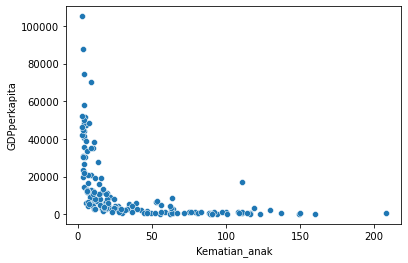

In [11]:
sns.scatterplot(data=df, x='Kematian_anak', y='GDPperkapita')
plt.show()

#### Multivariate Analysis

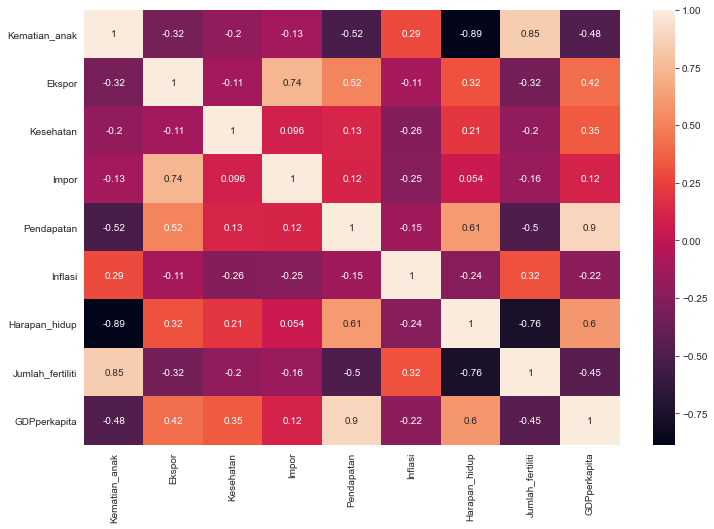

In [12]:
sns.set({'figure.figsize': (12,8)})
sns.heatmap(df.corr(), annot=True, fmt='.2g');

### Insight

1. Ekspor dan Impor memiliki korelasi positive yang cukup tinggi
2. kematian anak memiliki korelasi negative dengan harapan hidup
3. kematian anak memiliki korelasi positive dengan jumlah fertiliti
4. GDPperkapita memiliki korelasi positive yang tinggi dengan Pendapatan
5. GDPperkapita memiliki korelasi positive yang cukup tinggi dengan Ekspor

### Memeriksa Outliers

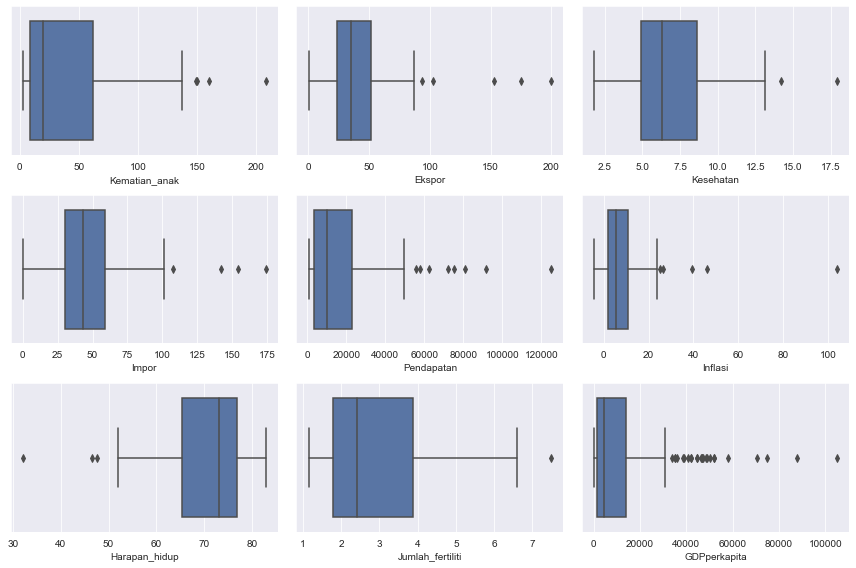

In [13]:
plt.figure(figsize=(12,8))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.boxplot(df[i[1]])
plt.tight_layout()
plt.show()

Dari visualisasi boxplot diatas, memang terdapat outliers dari setiap variabel yang ada. Tetapi saya tidak akan menghandling outliers ini karena setiap negara pasti memiliki kondisi berbeda-beda. Menghapus outliers bukanlah solusi mengingat jumlah baris dataset yang sedikit. 
Serta adanya outliers pada variabel kematian anak dan harapan hidup memberikan kita informasi bahwa outliers tersebut merupakan indikator bahwa negara tersebut yang membutuhkan bantuan.

### Feature Selection

Berdasarkan pada heatmap diatas, berikut adalah list variabel yang memiliki korelasi tinggi

- Ekspor <-> Impor
- Kematian_anak <-> Harapan_hidup
- Kematian_anak <-> Jumlah_fertiliti
- GDPperkapita <-> Pendapatan
- GDPperkapita <-> Ekspor

Dari list tersebut terdapat 2 variabel saling berpasangan oleh karena itu saya harus meremove salah satu variabel yang memiliki korelasi tinggi. Kenapa? karena jika 2 variabel memiliki korelasi yang tinggi maka 2 variabel tersebut menunjukan informasi yang sama. Sehingga ditakutkan hasil dari k means akan ketarik oleh variabel2 yang memiliki korelasi tinggi.

Namun dibanding meremove variabel, saya memutuskan untuk menggunakan variabel Kematian_anak serta GDPperkapita

In [14]:
df2 = df[['Kematian_anak', 'GDPperkapita']]

### Scaling

In [15]:
#feature scaling

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
df_std = rc.fit_transform(df2.astype(float))

Karena saya memutuskan untuk tidak menghandle outliers, maka saya menggunakan robust scaler yang diklaim mampu bekerja dengan baik jika ada outlier dibanding standard scaler & minmax scaler yang performanya buruk jika ada outlier di datasetnya serta menyebabkan mislead

## Modelling

### Clustering menggunakan K Means

In [16]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [17]:
df3 = pd.DataFrame(data=df_std, columns=['Kematian_anak','GDPperkapita'])
df3['Label'] = labels1
df3

,Kematian_anak,GDPperkapita,Label
0,1.316620,-0.322877,1
1,-0.050139,-0.044811,1
2,0.148561,-0.015723,1
3,1.851439,-0.088836,1
4,-0.167131,0.592767,1
...,...,...,...
162,0.183844,-0.132862,1
163,-0.040854,0.694969,1
164,0.074280,-0.263365,1
165,0.687094,-0.263365,1


### Elbow Method

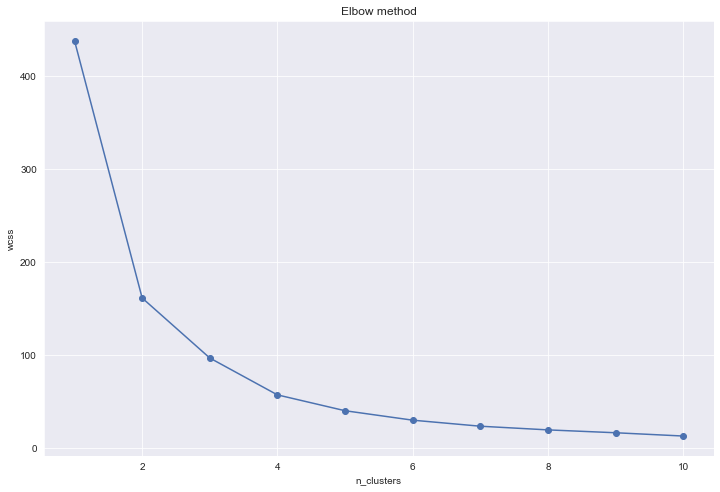

In [18]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

Dari hasil elbow method, terlihat bahwa grafik tersebut mulai flatten di angka 3, sehingga dipilih jumlah cluster = 3

In [19]:
kmeans2 = KMeans(n_clusters = 3, random_state=42).fit(df_std)
labels2 = kmeans2.labels_
labels2

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [20]:
df3['Label2'] = labels2
df3

,Kematian_anak,GDPperkapita,Label,Label2
0,1.316620,-0.322877,1,2
1,-0.050139,-0.044811,1,0
2,0.148561,-0.015723,1,0
3,1.851439,-0.088836,1,2
4,-0.167131,0.592767,1,0
...,...,...,...,...
162,0.183844,-0.132862,1,0
163,-0.040854,0.694969,1,0
164,0.074280,-0.263365,1,0
165,0.687094,-0.263365,1,2


### Silhouette Score

In [21]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1)) # 2 cluster
print(silhouette_score(df_std, labels= labels2)) # 3 cluster

0.6696658626312174
0.5411808389626492


Silhoutte Score dengan 3 cluster lebih baik dibanding 2 cluster

### Menggabungkan Dataframe awal dengan Dataframe yang sudah dilabeli

In [22]:
df_final = df

In [23]:
df_final['Label'] = df3['Label2']

In [24]:
df_final.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Label
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


### Clustering Analysis

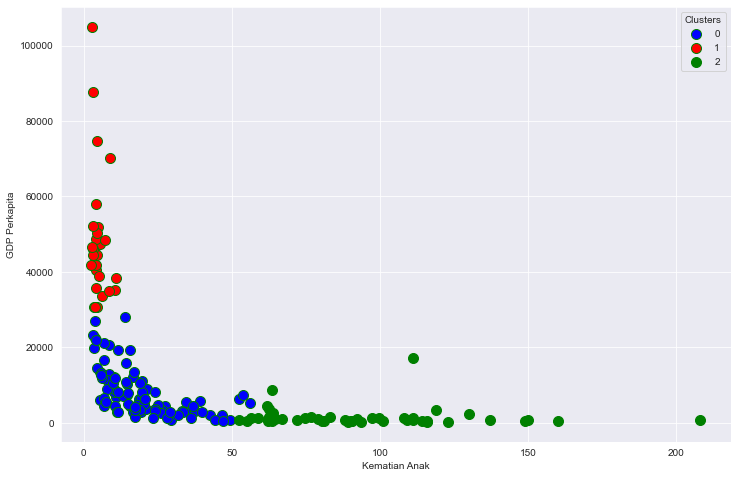

In [25]:
plt.figure(figsize=(12,8))

plt.scatter(df_final['Kematian_anak'][df_final.Label==0], df_final['GDPperkapita'][df_final.Label==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(df_final['Kematian_anak'][df_final.Label==1], df_final['GDPperkapita'][df_final.Label==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(df_final['Kematian_anak'][df_final.Label==2], df_final['GDPperkapita'][df_final.Label==2], label='2', c='green', s=100, edgecolors='green')
plt.xlabel('Kematian Anak')
plt.ylabel('GDP Perkapita')
plt.legend(title='Clusters')
plt.show()

In [26]:
health_metrics = df_final.groupby('Label')[['Kematian_anak','Kesehatan','Harapan_hidup','Jumlah_fertiliti']].mean()
health_metrics

,Kematian_anak,Kesehatan,Harapan_hidup,Jumlah_fertiliti
Label,,,,
0,20.046739,6.595000,72.958696,2.263478
1,4.967857,8.898214,80.553571,1.820357
2,93.780851,6.007021,59.895745,4.959574


In [27]:
economic_metrics = df_final.groupby('Label')[['Ekspor','Impor','Pendapatan','Inflasi','GDPperkapita']].mean()
economic_metrics

,Ekspor,Impor,Pendapatan,Inflasi,GDPperkapita
Label,,,,,
0,43.005217,49.497826,14107.065217,7.140109,7975.717391
1,56.575000,47.532143,50225.000000,2.941107,48453.571429
2,28.183383,41.403530,3383.255319,11.921809,1586.127660


#### Insight

Dari hasil analisa cluster, dapat disimpulkan bahwa: 
- Label 0 merupakan kelompok negara <b>Low-Mid Economic, Mid-High Sanitation</b>
- Label 1 merupakan kelompok negara <b>High Economic, High Sanitation</b>
- Label 2 merupakan kelompok negara <b>Low Economic, Low Sanitation</b>

Selanjutnya akan dilakukan mapping untuk memberikan kategori dari setiap label untuk memudahkan dalam pembacaan berikut listnya:
- Label 1 termasuk negara dengan kategori 'Safe' (aman)
- Label 0 termasuk negara dengan kategori 'Warning' (waspada)
- Label 2 termasuk negara dengan kategori 'Danger' (bahaya)

In [28]:
df_final['Kategori'] = df_final['Label'].map({
    0: 'Warning',
    1: 'Safe',
    2: 'Danger'
})

df_final.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Label,Kategori
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,Danger
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,Warning
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,Warning
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,Danger
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,Warning


In [29]:
df_final['Kategori'].value_counts()

Warning    92
Danger     47
Safe       28
Name: Kategori, dtype: int64

Selanjutnya akan dilist negara dengan GDPperkapita terendah dan Kematian_anak tertinggi

In [30]:
Lowest_GDP = df_final[df_final['Kategori'] == 'Danger'].sort_values('GDPperkapita').reset_index(drop=True)
Lowest_GDP = Lowest_GDP.iloc[:10]
Lowest_GDP

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Label,Kategori
0,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2,Danger
1,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,2,Danger
2,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2,Danger
3,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2,Danger
4,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,2,Danger
5,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,2,Danger
6,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,2,Danger
7,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2,Danger
8,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,2,Danger
9,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,2,Danger


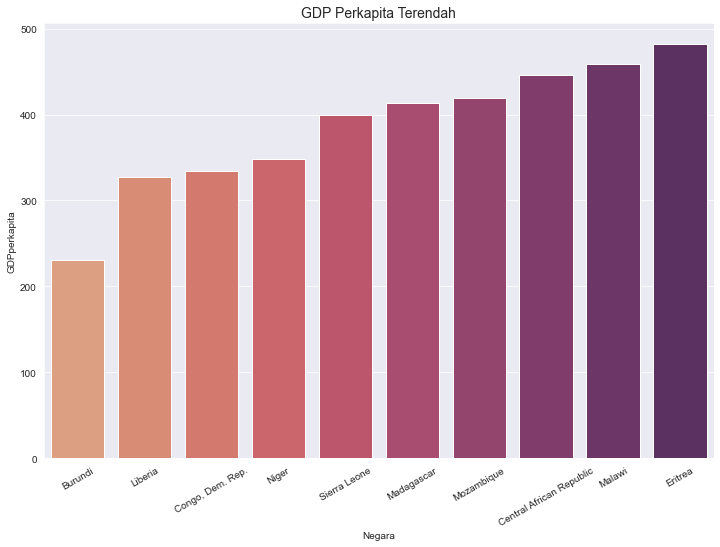

In [31]:
sns.barplot(data=Lowest_GDP, x='Negara', y='GDPperkapita', palette='flare')
plt.title('GDP Perkapita Terendah', fontsize=14)
plt.xticks(rotation='30')
plt.show()

In [32]:
Highest_Death = df_final[df_final['Kategori'] == 'Danger'].sort_values('Kematian_anak', ascending=False).reset_index(drop=True)
Highest_Death = Highest_Death.iloc[:10]
Highest_Death

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Label,Kategori
0,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,2,Danger
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,2,Danger
2,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,2,Danger
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,2,Danger
4,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,2,Danger
5,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,2,Danger
6,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,2,Danger
7,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,Danger
8,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,2,Danger
9,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,2,Danger


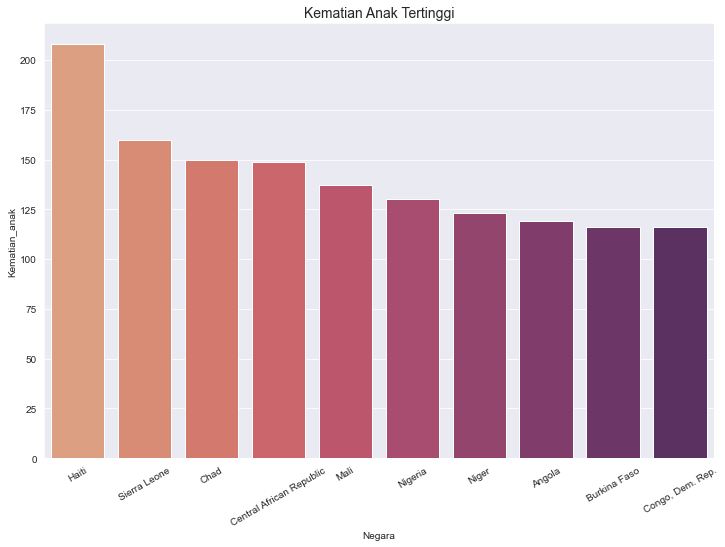

In [33]:
sns.barplot(data=Highest_Death, x='Negara', y='Kematian_anak', palette='flare')
plt.title('Kematian Anak Tertinggi', fontsize=14)
plt.xticks(rotation='30')
plt.show()

In [34]:
Top_Priority = pd.concat([Lowest_GDP, Highest_Death]).reset_index()
Top_Priority['Negara'].value_counts()

Congo, Dem. Rep.            2
Central African Republic    2
Niger                       2
Sierra Leone                2
Chad                        1
Malawi                      1
Burkina Faso                1
Haiti                       1
Madagascar                  1
Burundi                     1
Liberia                     1
Nigeria                     1
Eritrea                     1
Angola                      1
Mozambique                  1
Mali                        1
Name: Negara, dtype: int64

#### Insight

Dari hasil yang diperoleh, terdapat 4 negara yang masuk kedalam negara dengan GDP terendah dan kematian anak tertinggi yaitu: 
- Central African Republic
- Congo, Dem. Rep
- Sierra Leone
- Niger

Keempat negara ini masuk sebagai prioritas utama untuk mendapatkan bantuan, disusul oleh negara yang masuk kedalam GDP terendah atau kematian anak tertinggi. Lalu dilanjutkan oleh negara yang masuk kedalam kategori Danger dan belum mendapatkan bantuan